In [11]:
import pandas as pd
import numpy as np

import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
def dicom_2_array(path):
    window_center = -600
    window_width = 1600

    slice = pydicom.read_file(path)
    s = int(slice.RescaleSlope)
    b = int(slice.RescaleIntercept)
    image = s * slice.pixel_array + b

    # apply_voi_lut( )
    slice.WindowCenter = window_center
    slice.WindowWidth = window_width
    image2 = apply_voi_lut(image, slice)

    return image2

In [85]:
df = pd.read_csv('overview.csv')

df_contrast = df.loc[df.Contrast == True,:][:8]
df_none = df.loc[df.Contrast == False,:][:8]

df_subset =pd.concat([df_contrast, df_none]).reset_index(drop=True)

In [97]:
df_subset

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm
5,5,48,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (14).dcm,5,ID_0005_AGE_0048_CONTRAST_1_CT.tif,ID_0005_AGE_0048_CONTRAST_1_CT.dcm
6,6,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (15).dcm,6,ID_0006_AGE_0075_CONTRAST_1_CT.tif,ID_0006_AGE_0075_CONTRAST_1_CT.dcm
7,7,61,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (16).dcm,7,ID_0007_AGE_0061_CONTRAST_1_CT.tif,ID_0007_AGE_0061_CONTRAST_1_CT.dcm
8,50,74,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,50,ID_0050_AGE_0074_CONTRAST_0_CT.tif,ID_0050_AGE_0074_CONTRAST_0_CT.dcm
9,51,63,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,51,ID_0051_AGE_0063_CONTRAST_0_CT.tif,ID_0051_AGE_0063_CONTRAST_0_CT.dcm


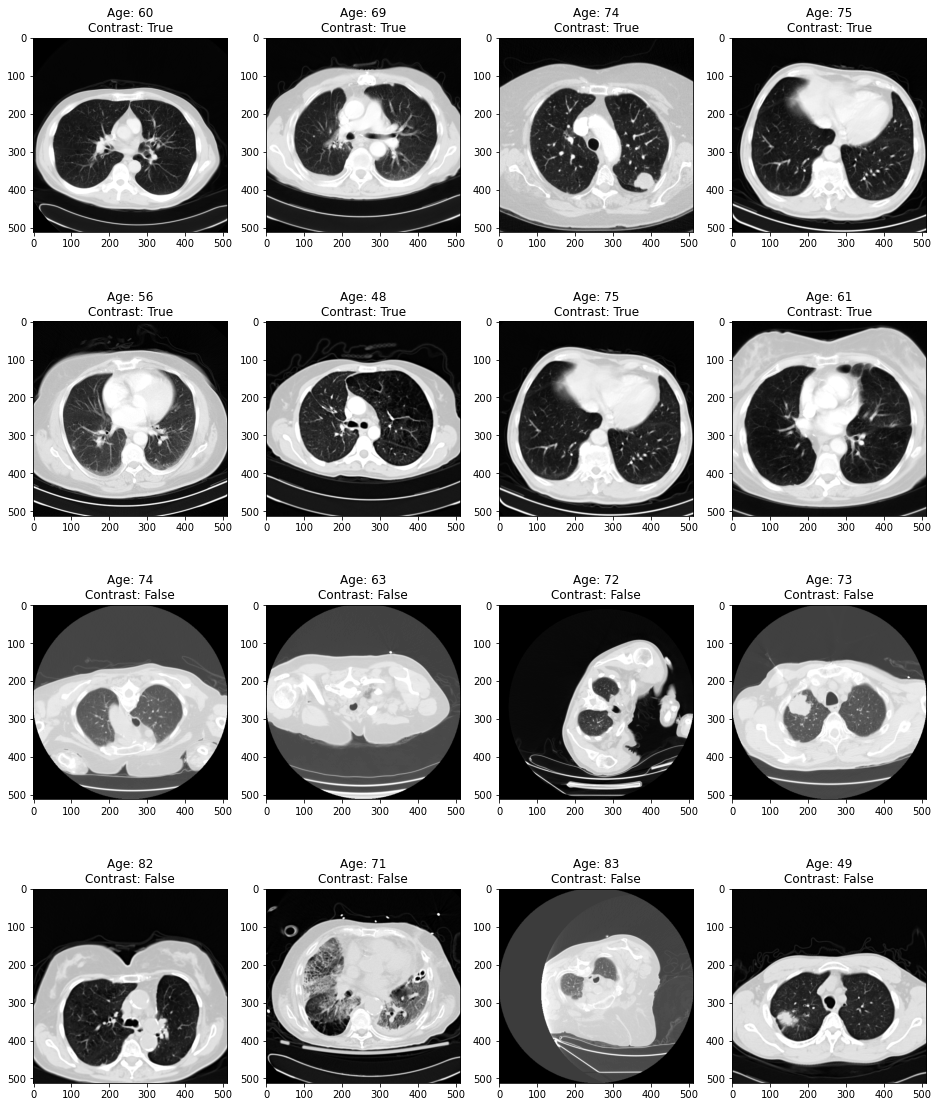

In [96]:
f, ax = plt.subplots(4,4, figsize=(16,20))

for i, data in enumerate(df_subset.values):
    
    path = 'dicom_dir/' + data[-1]
    image = dicom_2_array(path)
    ax[i//4, i%4].imshow(image, cmap='gray')
    ax[i//4, i%4].set_title(f'Age: {data[1]}\nContrast: {data[2]}')

In [103]:
pixel_array = []

for path in df.dicom_name:
    dicom_path = 'dicom_dir/' + path
    array = dicom_2_array(dicom_path)
    
    pixel_array.append(array)
    
df['pixel_array'] = pixel_array

In [110]:
df.to_csv("final_df.csv",index=False)